# Questionnaire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import joblib

In [2]:
path = '../Questionnaire/difficulty_rating.csv'

In [3]:
difficulty_df = pd.read_csv(path, sep=' ', index_col=0)

In [4]:
difficulty_df

,P1_technical,P1_cognitive,P2_technical,P2_cognitive,P3_technical,P3_cognitive,P4_technical,P4_cognitive
Task,,,,,,,,
1,1,2,1,1,1,1,1,1
2,3,3,1,2,1,1,1,2
3,2,2,1,2,1,3,2,2
4,3,2,2,4,1,3,2,2
5,2,3,1,1,1,1,1,1
6,3,4,3,1,1,2,3,2
7,2,3,2,2,1,2,1,2
8,3,3,2,2,1,4,3,2
9,2,1,1,1,1,1,1,1


In [5]:
labels = joblib.load("./plot_data/labels")

[]

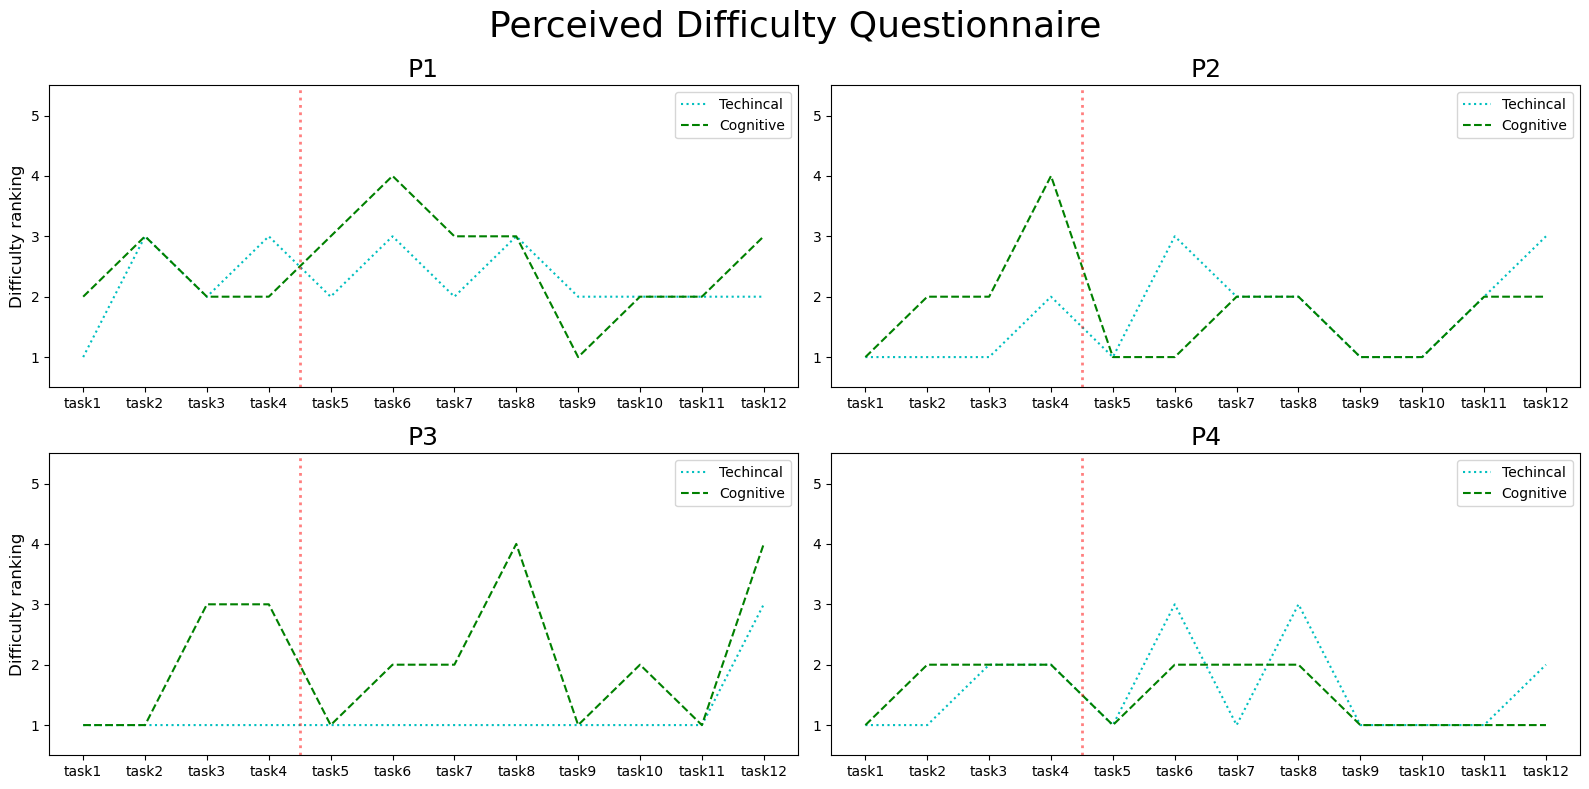

In [6]:
fig, ax = plt.subplots(2,2,figsize=(16,8))

fig.suptitle('Perceived Difficulty Questionnaire', fontsize=26)

ax[0,0].plot(labels, difficulty_df['P1_technical'], ':c', label='Techincal')
ax[0,0].plot(labels, difficulty_df['P1_cognitive'], '--g', label='Cognitive')

ax[0,1].plot(labels, difficulty_df['P2_technical'], ':c', label='Techincal')
ax[0,1].plot(labels, difficulty_df['P2_cognitive'], '--g', label='Cognitive')

ax[1,0].plot(labels, difficulty_df['P3_technical'], ':c', label='Techincal')
ax[1,0].plot(labels, difficulty_df['P3_cognitive'], '--g', label='Cognitive')

ax[1,1].plot(labels, difficulty_df['P4_technical'], ':c', label='Techincal')
ax[1,1].plot(labels, difficulty_df['P4_cognitive'], '--g', label='Cognitive')

ax[0,0].set_ylim(0.5,5.5)
ax[0,1].set_ylim(0.5,5.5)
ax[1,0].set_ylim(0.5,5.5)
ax[1,1].set_ylim(0.5,5.5)

ax[0,0].set_title("P1", fontsize=18)
ax[0,1].set_title("P2", fontsize=18)
ax[1,0].set_title("P3", fontsize=18)
ax[1,1].set_title("P4", fontsize=18)

ax[0,0].set_ylabel('Difficulty ranking', fontsize=12)
ax[1,0].set_ylabel('Difficulty ranking', fontsize=12)

# Border between Impro and Scales
ax[0,0].axvline(x=3.5, ls=':', lw=2, c='r', alpha=0.5)
ax[0,1].axvline(x=3.5, ls=':', lw=2, c='r', alpha=0.5)
ax[1,0].axvline(x=3.5, ls=':', lw=2, c='r', alpha=0.5)
ax[1,1].axvline(x=3.5, ls=':', lw=2, c='r', alpha=0.5)

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

# Only ticks from 1-5
ax[0,0].set_yticks(np.arange(1, 6))

plt.tight_layout()
plt.savefig("./plots/quest_results.pdf")
plt.plot()

# Mean across participants (pr task)

In [7]:
# Making new dataframes pr category
tech_diff = pd.DataFrame()
cogn_diff = pd.DataFrame()

for col in difficulty_df:
    if 'technical' in col:
        tech_diff[col] = difficulty_df[col]
    if 'cognitive' in col:
        cogn_diff[col] = difficulty_df[col]

In [8]:
# Making new columns with Means
tech_diff['task_mean'] = tech_diff.mean(axis=1)
cogn_diff['task_mean'] = cogn_diff.mean(axis=1)


In [9]:
tech_diff

,P1_technical,P2_technical,P3_technical,P4_technical,task_mean
Task,,,,,
1,1,1,1,1,1.00
2,3,1,1,1,1.50
3,2,1,1,2,1.50
4,3,2,1,2,2.00
5,2,1,1,1,1.25
6,3,3,1,3,2.50
7,2,2,1,1,1.50
8,3,2,1,3,2.25
9,2,1,1,1,1.25


In [10]:
cogn_diff

,P1_cognitive,P2_cognitive,P3_cognitive,P4_cognitive,task_mean
Task,,,,,
1,2,1,1,1,1.25
2,3,2,1,2,2.00
3,2,2,3,2,2.25
4,2,4,3,2,2.75
5,3,1,1,1,1.50
6,4,1,2,2,2.25
7,3,2,2,2,2.25
8,3,2,4,2,2.75
9,1,1,1,1,1.00


[]

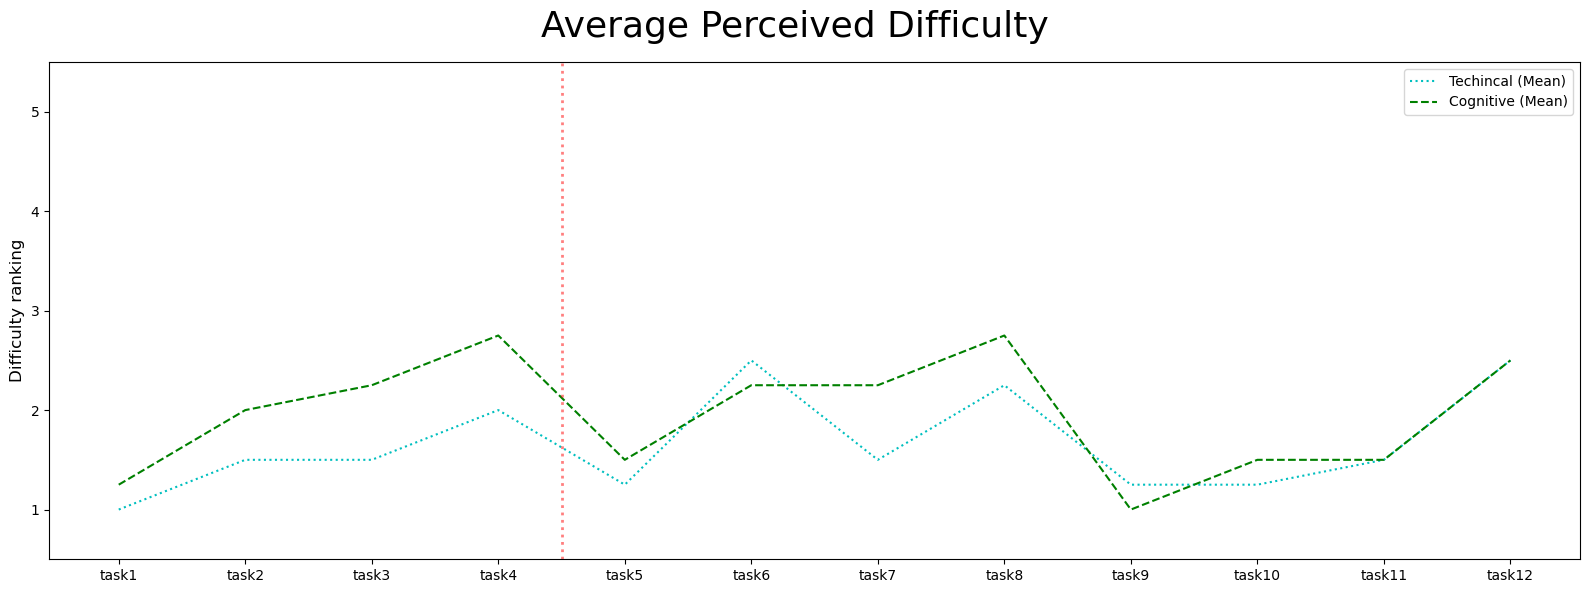

In [11]:
fig, ax = plt.subplots(figsize=(16,6))

fig.suptitle('Average Perceived Difficulty', fontsize=26)

ax.plot(labels, tech_diff['task_mean'], ':c', label='Techincal (Mean)')
ax.plot(labels, cogn_diff['task_mean'], '--g', label='Cognitive (Mean)')

ax.set_ylim(0.5,5.5)

ax.set_ylabel('Difficulty ranking', fontsize=12)

# Border between Impro and Scales
ax.axvline(x=3.5, ls=':', lw=2, c='r', alpha=0.5)

ax.legend()

# Only ticks from 1-5
ax.set_yticks(np.arange(1, 6))

plt.tight_layout()
plt.savefig("./plots/quest_avg.pdf")
plt.plot()

In [12]:
joblib.dump(difficulty_df, "./plot_data/difficulty_df")

['./plot_data/difficulty_df']